In [64]:
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/regression_to_baseline_age-sex_covaried'

In [66]:
csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/metadata/atrophy_to_baseline/correlation_to_adascog13.csv'

Create Your Own Data PRN

In [ ]:
import pandas as pd

data = {
    'Frontal Lobe': {'CSF': 0.07, 'Surface': 0.04, 'GM': 0.2, 'WM': 0.27, 'Radiologist': 0.22},
    'Parietal Lobe': {'CSF': 0.12, 'Surface': 0.03, 'GM': 0.16, 'WM': 0.22, 'Radiologist': 0.02},
    'Occipital Lobe': {'CSF': 0.28, 'Surface': 0.11, 'GM': 0.24, 'WM': 0.13, 'Radiologist': 0.22},
    'Temporal Lobe': {'CSF': 0.31, 'Surface': 0.22, 'GM': 0.26, 'WM': 0.15, 'Radiologist': 0.2},
    'Mesial Temporal Lobe': {'CSF': 0.35, 'Surface': 0.0, 'GM': 0.48, 'WM': 0.27, 'Radiologist': 0.25},
    'Cerebellum': {'CSF': 0.07, 'Surface': 0.01, 'GM': 0.21, 'WM': 0.17, 'Radiologist': -0.04},
    'Ventriculomegaly': {'CSF': 0.22, 'Surface': 0.00, 'GM': 0.05, 'WM': 0.29, 'Radiologist': 0.32},
}
df = pd.DataFrame(data)
df


In [76]:
import pandas as pd
df = pd.read_csv(csv_path)
# df = df[df['Region'] != 'All']
df = df.loc[14:, :]
df = df.loc[:, ~df.columns.str.contains(' P')]
df

,Method,Cerebellum R,MTL R,Subcortex R,Temporal R,Parietal R,Frontal R,Occipital R
14,ZCSF_removed_age-sex,0.17,0.44,0.28,0.45,0.26,0.23,0.36
15,Zsurf_removed_age-sex,0.00,0.24,0.00,0.35,0.14,0.16,0.15
16,ZGM_removed_age-sex,0.35,0.59,0.21,0.45,0.34,0.38,0.39
17,ZWM_removed_age-sex,0.24,0.39,0.46,0.33,0.37,0.42,0.23
18,Zrad_removed_age-sex,-0.01,0.28,0.42,0.40,0.00,0.30,0.27


Simple Bar Plot

In [63]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

def plot_barplots(df, x_col, y_col, hue=None, palette="tab10"):
    ax = sns.barplot(data=df, x=x_col, y=y_col, hue=hue, palette=palette)
    return ax 
    
def plot_point_as_diamond(df, ax, point_col, palette="tab10"):
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    plt.scatter(x=x_coords, y=df[point_col], color='k', marker='D', facecolors='none')
    
def plot_error_bars(df, ax, err_col, palette="tab10"):
    x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.errorbar(x=x_coords, y=y_coords, yerr=df[err_col], capsize=6, fmt="none", c="k")

def show_and_save_plot(out_dir=None):
    if out_dir is not None:
        plt.savefig(os.path.join(out_dir, 'barplot.svg'))
    plt.show()

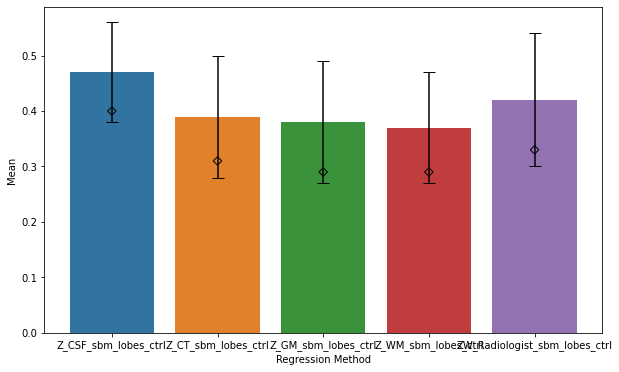

In [65]:
# Call the plotting functions
plt.figure(figsize=(10,6))
ax = plot_barplots(df, 'Regression Method', 'Mean')
plot_error_bars(df=df, ax=ax, err_col='Std')
plot_point_as_diamond(df=df, ax=ax, point_col='Point R-squared')
show_and_save_plot(out_dir)

Create Barplot Of Methods Within Groups
- The groups to compare within are the top level keys of the dictionary. 
- The groups to compare across are the second-level keys

In [77]:
import pandas as pd

def melt_dataframe(df):
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=['Method'], var_name='Region', value_name='R-Squared')
    
    # Extract the region names from the 'Region' column
    melted_df['Region'] = melted_df['Region'].str.split(' ', expand=True)[0]
    
    return melted_df

melted_df = melt_dataframe(df)
melted_df

,Method,Region,R-Squared
0,ZCSF_removed_age-sex,Cerebellum,0.17
1,Zsurf_removed_age-sex,Cerebellum,0.00
2,ZGM_removed_age-sex,Cerebellum,0.35
3,ZWM_removed_age-sex,Cerebellum,0.24
4,Zrad_removed_age-sex,Cerebellum,-0.01
5,ZCSF_removed_age-sex,MTL,0.44
6,Zsurf_removed_age-sex,MTL,0.24
7,ZGM_removed_age-sex,MTL,0.59
8,ZWM_removed_age-sex,MTL,0.39
9,Zrad_removed_age-sex,MTL,0.28


FileNotFoundError: [Errno 2] No such file or directory: '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/correlation_to_baseline_scores_controlled/barplot.svg'

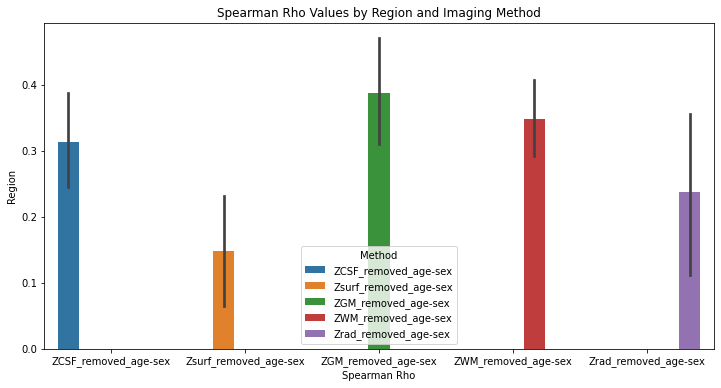

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='Method', y='R-Squared', hue='Method', data=melted_df)

# Customizing the plot
# plt.xlim(-0.25, 1)
plt.title('Spearman Rho Values by Region and Imaging Method')
plt.ylabel('Region')
plt.xlabel('Spearman Rho')
output_file_path = os.path.join(out_dir, 'barplot.svg')
plt.savefig(output_file_path, format='svg')
# Show the plot
plt.show()

Swap Grouping

In [ ]:
data

In [ ]:
# Transpose the data to swap grouping
df = pd.DataFrame(df).T.melt(var_name='Imaging Method', value_name='R-Squared', ignore_index=False).reset_index()


# Generate Grouped Barplot

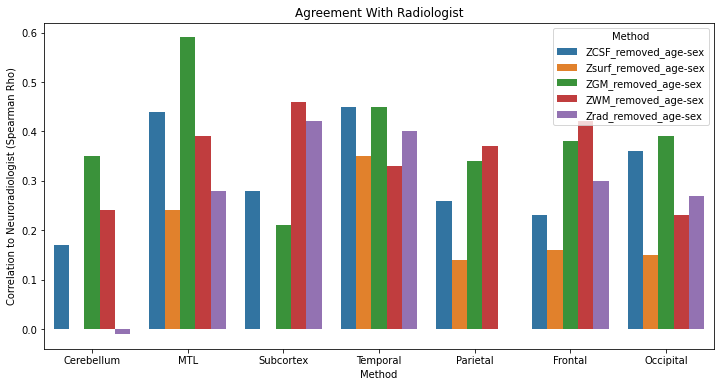

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/correlation_to_baseline_scores_controlled'

# Create the bar plot with swapped grouping
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.barplot(x='Region', y='R-Squared', hue='Method', data=melted_df)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.title('Agreement With Radiologist')
plt.xlabel('Method')
plt.ylabel('Correlation to Neuroradiologist (Spearman Rho)')

# Save the plot as an SVG file
output_file_path = os.path.join(out_dir, 'barplot.svg')
# plt.savefig(output_file_path, format='svg')

# Show the plot (optional)
plt.show()


# Generate Boxplot

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/correlation_to_baseline_scores_controlled/boxplot.svg'

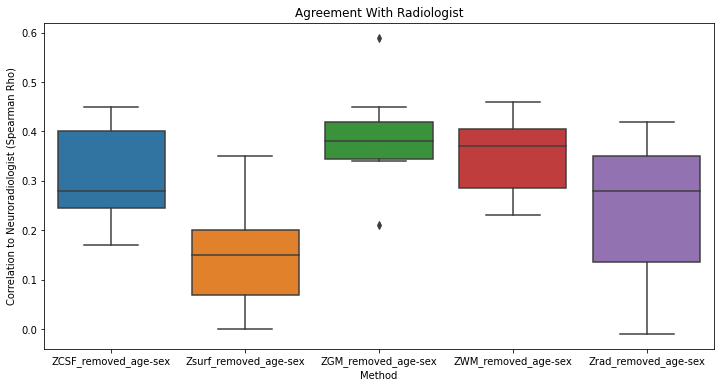

In [82]:
# df = pd.DataFrame(df).T.melt(var_name='Imaging Method', value_name='R-Squared', ignore_index=False).reset_index()

# Create the bar plot with swapped grouping
plt.figure(figsize=(12, 6))
sns.set_palette("tab10")
sns.boxplot(x='Method', y='R-Squared', data=melted_df)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.title('Agreement With Radiologist')
plt.xlabel('Method')
plt.ylabel('Correlation to Neuroradiologist (Spearman Rho)')

# Save the plot as an SVG file
output_file_path = os.path.join(out_dir, 'boxplot.svg')
plt.savefig(output_file_path, format='svg')

# Show the plot (optional)
plt.show()